by [Leonardo Manríquez M](https://github.com/leomanriquezm)

E-mail: leonardomanriquezmendez@gmail.com

# Variable dicotómicas
Para los siguientes ejemplos utilizaremos el siguiente conjunto de datos.

In [31]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import statsmodels.api as sm

file="https://raw.githubusercontent.com/leomanriquezm/introduction-to-econometrics/main/df_example.csv"
df=pd.read_table(file,delimiter = ',')

##Afecta posición
Supongamos que estamos interesados en estimar la siguiente ecuación de regresión:
\begin{equation}
ventas_{i}=\beta_{0}+\beta_{1}\cdot PP_{i} + \gamma \cdot P_{i}+\mu_{i},
\tag{1}
\end{equation}
donde $ventas$ corresponde al nivel de ventas, $PP$ al precio promedio dle producto y $P$ es una variable dicotómica que asume el valor 1 cuando la publicidad es del tipo 1 y 0 en otro caso.

A continuación, observaremos la relación gráfica entre la variable a explicar y las variables explicativas.

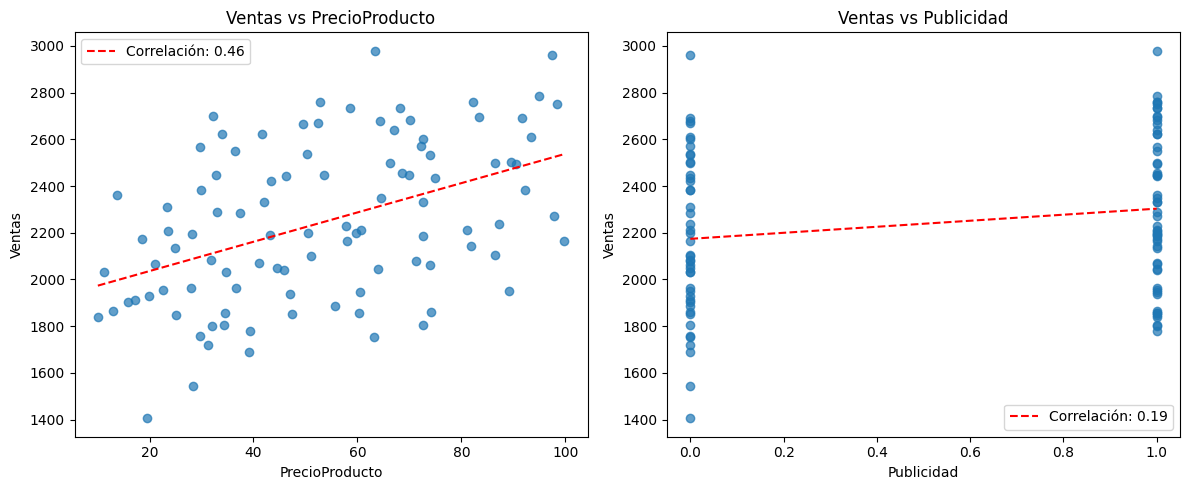

In [16]:
variables_explicativas = ['PrecioProducto', 'Publicidad']
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

for i, variable in enumerate(variables_explicativas):
    axes[i].scatter(df[variable], df['Ventas'], alpha=0.7)
    axes[i].set_xlabel(variable)
    axes[i].set_ylabel('Ventas')
    axes[i].set_title(f'Ventas vs {variable}')

    # Añadir la línea de regresión lineal
    coef_correlation = np.corrcoef(df[variable], df['Ventas'])[0, 1]
    axes[i].plot(np.unique(df[variable]), np.poly1d(np.polyfit(df[variable], df['Ventas'], 1))(np.unique(df[variable])),
                 color='red', linestyle='--', label=f'Correlación: {coef_correlation:.2f}')
    axes[i].legend()

plt.tight_layout()
plt.show()

Ahora, para estimar el modelo de regresión lineal múltiple de la ecuación (1) debemos seguir las siguientes instrucciones.

In [17]:
# Ajustar el modelo de regresión lineal múltiple
X = df[["PrecioProducto","Publicidad"]]
# Agregar columna de unos para el término constante
X = sm.add_constant(X)
y = df['Ventas']

model = sm.OLS(y, X).fit()

# Imprimir los resultados del modelo
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 Ventas   R-squared:                       0.264
Model:                            OLS   Adj. R-squared:                  0.249
Method:                 Least Squares   F-statistic:                     17.40
Date:                Mon, 07 Aug 2023   Prob (F-statistic):           3.48e-07
Time:                        21:14:11   Log-Likelihood:                -708.28
No. Observations:                 100   AIC:                             1423.
Df Residuals:                      97   BIC:                             1430.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           1803.4904     80.494     22.

Por lo tanto, la ecuación estimada para (1) corresponde a:
\begin{equation}
\tag{2}
\hat{ventas_{i}}=1803.49+6.60\cdot PP_{i} + 162.13\cdot P_{i}.
\end{equation}
Notemos que $\hat{\gamma}=162.13$, por lo tanto las empresas que tienen el tipo de publicidad 1 tienen, en promedio, un nivel de ventas mayor a las empresas que no tiene el nivel 1 en 162.13 unidades. Adicionalmente, notemos que para $\alpha=0.05$, el parámetro $\hat{\gamma}$ es estadísticamente diferente de cero, lo que implica que la diferencia mencionada entre las empresas que tienen el tipo de publicidad 1 y las que no, es estadísticamente significativo.

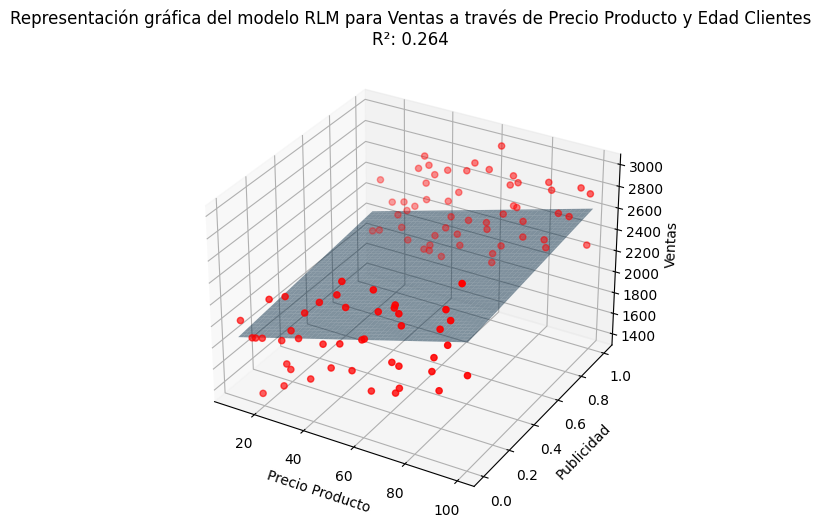

In [20]:
# Obtener los coeficientes de la recta de regresión
coef_intercept = model.params[0]
coef_PrecioProducto, coef_Publicidad = model.params[1:]

# Configurar el tamaño del gráfico
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')

# Crear el gráfico en 3D
ax.scatter(df["PrecioProducto"], df["Publicidad"], df["Ventas"], c='r', marker='o')

# Agregar la recta de regresión
Publicidad_range = np.linspace(min(df["Publicidad"]), max(df["Publicidad"]), 100)
PrecioProducto_range = np.linspace(min(df["PrecioProducto"]), max(df["PrecioProducto"]), 100)
Publicidad_range, PrecioProducto_range = np.meshgrid(Publicidad_range,PrecioProducto_range)
Ventas_range = coef_intercept + coef_Publicidad*Publicidad_range + coef_PrecioProducto * PrecioProducto_range
ax.plot_surface(PrecioProducto_range, Publicidad_range, Ventas_range, alpha=0.5)

# Etiquetas de los ejes
ax.set_xlabel('Precio Producto')
ax.set_ylabel('Publicidad')
ax.set_zlabel('Ventas')

# Coeficiente de determinación (R²)
r_squared = model.rsquared

# Coeficiente de determinación ajustado (R² ajustado)
r_squared_adj = model.rsquared_adj

# Título del gráfico
ax.set_title(f'Representación gráfica del modelo RLM para Ventas a través de Precio Producto y Edad Clientes\nR²: {r_squared:.3f}')

# Mostrar el gráfico
plt.show()

## Afecta pendiente
Supongamos que estamos interesados en estimar la siguiente ecuación de regresión:
\begin{equation}
ventas_{i}=\beta_{0}+\beta_{1}\cdot PP_{i} + \gamma \cdot (P_{i}\cdot PP_{i})+\mu_{i},
\tag{3}
\end{equation}
Notar que a diferencia de la expresión en (1), tenemos una variable artificial que resulta del producto entre $P$ y $PP$, es decir, entre el tipo de publicidad y el precio promedio del producto.

Para representar la relación gráfica debemos generar la variable $P_{i}\cdot PP_{i}$.  Una vez generada dicha variable, la representación gráfica entre la variable a explicar y las variables explicativas queda como:

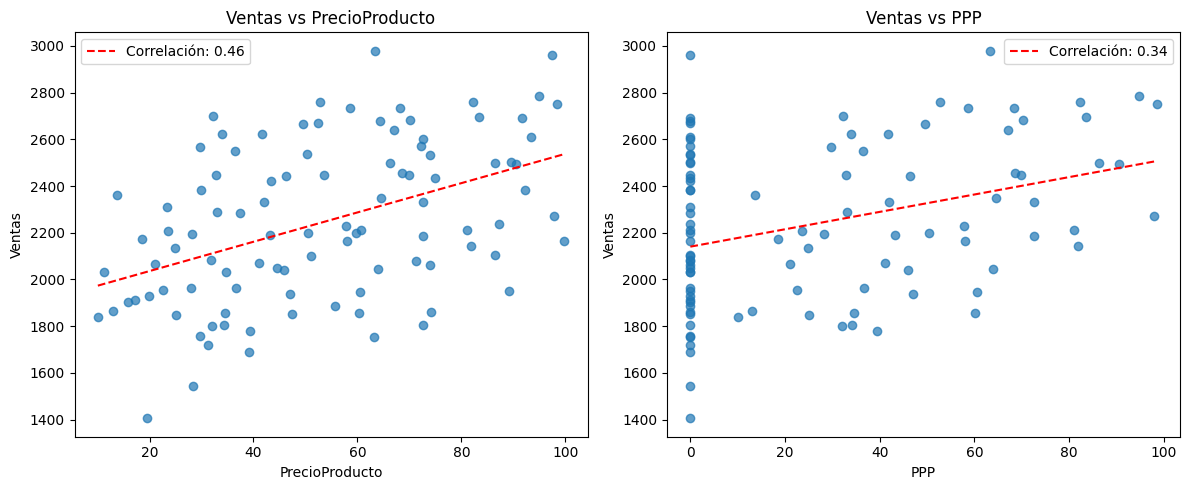

In [33]:
df["PPP"]=df["PrecioProducto"]*df["Publicidad"]
variables_explicativas = ['PrecioProducto', 'PPP']
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

for i, variable in enumerate(variables_explicativas):
    axes[i].scatter(df[variable], df['Ventas'], alpha=0.7)
    axes[i].set_xlabel(variable)
    axes[i].set_ylabel('Ventas')
    axes[i].set_title(f'Ventas vs {variable}')

    # Añadir la línea de regresión lineal
    coef_correlation = np.corrcoef(df[variable], df['Ventas'])[0, 1]
    axes[i].plot(np.unique(df[variable]), np.poly1d(np.polyfit(df[variable], df['Ventas'], 1))(np.unique(df[variable])),
                 color='red', linestyle='--', label=f'Correlación: {coef_correlation:.2f}')
    axes[i].legend()

plt.tight_layout()
plt.show()

Ahora para estimar el modelo de regresión lineal múltiple en (3) debemos seguir las siguientes instrucciones.

In [34]:
# Ajustar el modelo de regresión lineal múltiple
X = df[["PrecioProducto","PPP"]]
# Agregar columna de unos para el término constante
X = sm.add_constant(X)
y = df['Ventas']

model = sm.OLS(y, X).fit()

# Imprimir los resultados del modelo
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 Ventas   R-squared:                       0.250
Model:                            OLS   Adj. R-squared:                  0.235
Method:                 Least Squares   F-statistic:                     16.17
Date:                Mon, 07 Aug 2023   Prob (F-statistic):           8.69e-07
Time:                        21:41:46   Log-Likelihood:                -709.22
No. Observations:                 100   AIC:                             1424.
Df Residuals:                      97   BIC:                             1432.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           1894.2188     71.376     26.

Por lo tanto, la ecuación estimada para (3) corresponde a:
\begin{equation}
\tag{2}
\hat{ventas_{i}}=1894.21+5.32\cdot PP_{i} + 2.38\cdot P_{i}\cdot PP_{i}.
\end{equation}
Notemos que $\hat{\gamma}=2.38$. Sin embargo, debemos considerar que si estamos interesados en evaluar el efecto del tipo de publiidad en el nivel de ventas, debemos encontrar $\frac{\partial \hat{ventas}}{\partial P}=2.38\cdot PP$. Este resultado implica que el efecto de tener el tipo de publicidad 1 o no, también depende del nivel del precio promedio. Usualmente podemos utilizar un estadístico para $PP$ y luego interpretar. A continuación desarrollaremos el ejemplo para la media.

In [37]:
#calculamos el efecto como
model.params[2]*df["PrecioProducto"].mean()

127.32544215758573

Por lo tanto, tenemos que $\frac{\partial \hat{ventas}}{\partial P}=2.38\cdot \bar{PP}=127.32$. Lo que implica que, considerando el promedio de $PP$, las empresas que tienen el nivel de publicidad 1 tienen un nivel de ventas mayor al que las empresas que no tienen el tipo de publicidad 1 en 127.32 unidades. Notar que para $\alpha=0.05$, esta diferencia entre los grupos de empesas es estadísticamente significativa.